In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from plots import plots
from database import read_database
import re
import numpy as np

plt.rcParams['font.size'] = 16
# plt.rcParams['xtick.labelsize'] = 14

In [8]:
from importlib import reload
reload(plots);

In [9]:
output = Path('/data3/bolensadrien/output')
database = read_database(only_processed=True)
index_to_path = {int(re.search(r'^\d*', entry['name']).group()): output / entry['name'] for entry in database}
print([entry['name'] for entry in database[-30:]])

['283_deep_q_learning', '284_deep_q_learning', '285_deep_q_learning', '286_deep_q_learning', '287_deep_q_learning', '288_deep_q_learning', '289_deep_q_learning', '290_deep_q_learning', '291_deep_q_learning', '292_deep_q_learning', '293_deep_q_learning', '294_deep_q_learning', '295_deep_q_learning', '296_deep_q_learning', '297_deep_q_learning', '298_deep_q_learning', '299_deep_q_learning', '300_deep_q_learning', '301_deep_q_learning', '302_deep_q_learning', '303_deep_q_learning', '305_deep_q_learning', '311_deep_q_learning', '312_deep_q_learning', '314_deep_q_learning', '315_deep_q_learning', '316_deep_q_learning', '317_deep_q_learning', '318_deep_q_learning', '319_deep_q_learning']


[(3, 4, True, 'Dense'), (3, 4, True, 'LSTM')]


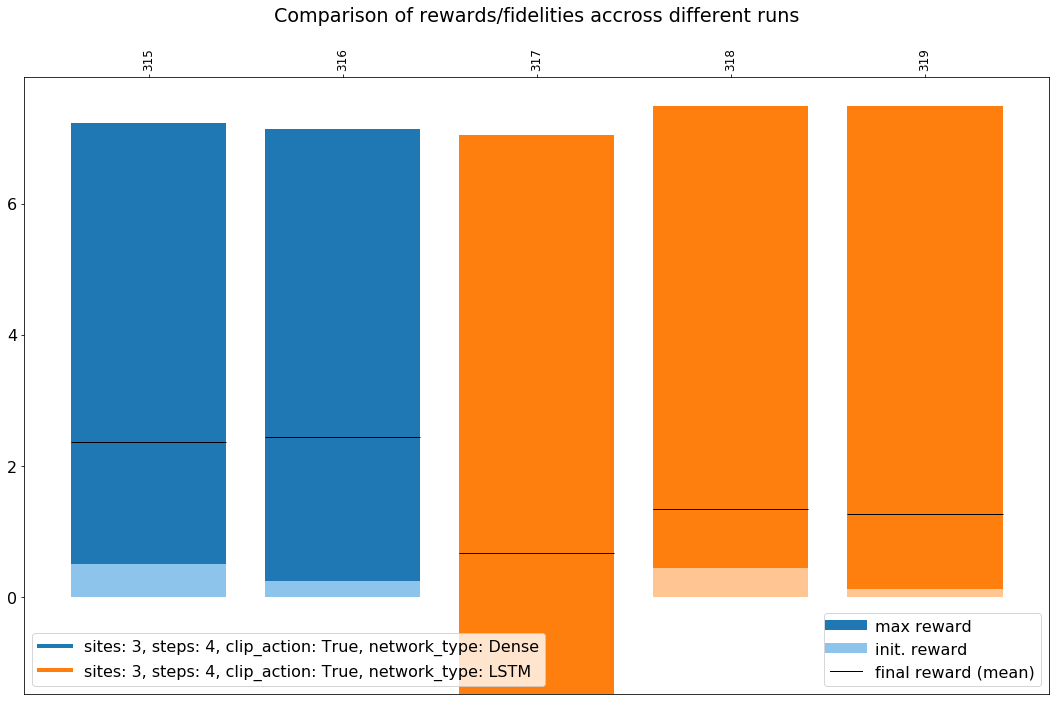

In [16]:
class_def = ['n_sites', 'n_steps', ('max_q_optimizer', 'clip_action'), 'network_type']
# , ('ham_params', 'alpha')]
param_filter = {'subclass': 'WithReplayMemory', ('ham_params', 'alpha'): 3.0, 'time_segment': 1, 
               'env_type': 'EnergyMinimizer'}
# ['DynamicalEvolution', np.nan]

paths_to_data = [output / entry['name'] for entry in database[-100:]]

fig, ax = plt.subplots(figsize=(15, 10))

# with plt.rc_context({'font.size': 15}):
# with plt.rc_context({'xtick.labelsize': 5, 'axes.labelsize': 5}):
plots.plot_comparison_of_rewards(paths_to_data, class_def, param_filter, ax=ax, with_legend=True, reward_range=None)
ax.tick_params(axis='x', labelsize=12) 
plt.tight_layout()

In [10]:
from importlib import reload
reload(plots);

In [11]:
class_def = ['n_sites', 'n_steps', 'range_one', 'range_all', 'initial_state']
# , ('ham_params', 'alpha')]
param_filter = {'subclass': 'WithReplayMemory', 'n_sites': 4}

paths_to_data = [output / entry['name'] for entry in database[-100:]]

# fig, ax = plt.subplots(figsize=(15, 10))

# plots.plot_rewards_vs_one_parameter(paths_to_data, 'time_segment', class_def, param_filter, ax=ax, with_legend=True)
# plt.tight_layout()

In [17]:
index = 319
path_to_data = index_to_path[index]

In [18]:
categories = ['main', 'q_learning', 'neural_network']
categories = 'all'
plots.plot_info(path_to_data, categories=categories, print_instead=True)

319_deep_q_learning, n_tasks=178/200

main: 
{'env_type': 'EnergyMinimizer',
 'n_sites': 3,
 'n_steps': 4,
 'system_class': 'LongRangeIsing',
 'time_segment': 1.0}

ham_params: 
{'ham_params': {'J': 1.0, 'alpha': 3.0, 'g': 2.0, 'h': 2.0}}

q_learning: 
{'exploration': 'gaussian',
 'n_episodes': 100000,
 'n_replays': 10,
 'replay_spacing': 50}

neural_network: 
{'architecture': [1],
 'capacity': 100,
 'model_update_spacing': 20,
 'network_type': 'LSTM',
 'sampling_size': 100,
 'subclass': 'WithReplayMemory'}

max_q_optimizer: 
{'max_q_optimizer': {'algorithm': 'NAG',
                     'clip_action': True,
                     'convergence_threshold': 0.005,
                     'learning_rate': 0.6,
                     'momentum': 0.9,
                     'n_initial_actions': 15,
                     'n_iterations': 10}}

other: 
{'NN_optimizer': 'SGD',
 'bc': 'open',
 'epsilon_decay': 0.9999411315398542,
 'epsilon_max': 1.0,
 'epsilon_min': 0.005,
 'initial_state': 'random_product

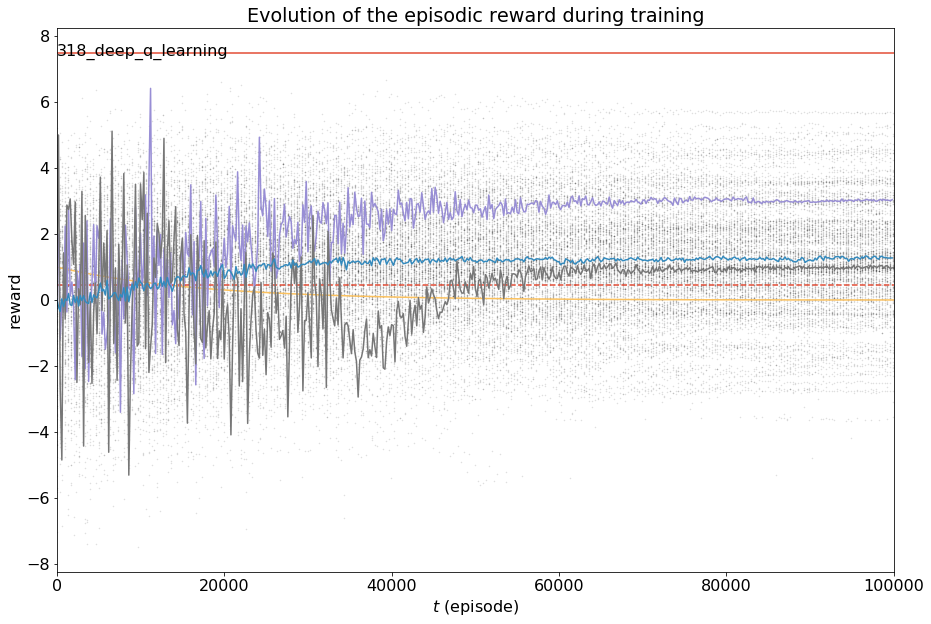

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_rewards_vs_episodes(path_to_data, n_x=500, n_x_scatter=300,
                               scatter=True, n_individual_runs=2, n_slices=0, yrange=None, ax=ax)

/usr/local/intel/intelpython/2019.0.047/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


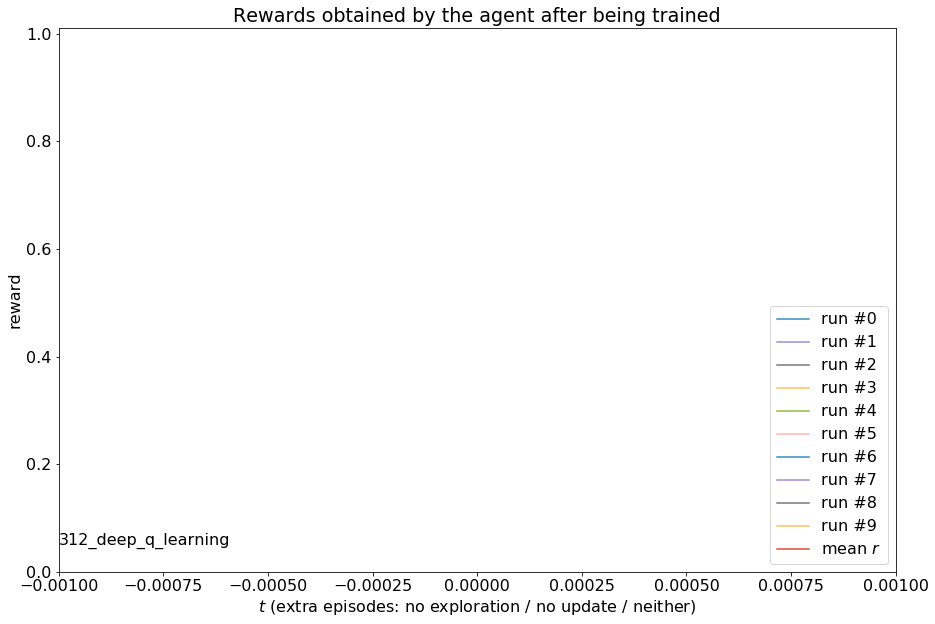

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_rewards_vs_extra_episodes(path_to_data, n_individual_runs=10, n_x=None, scatter=False, ax=ax)

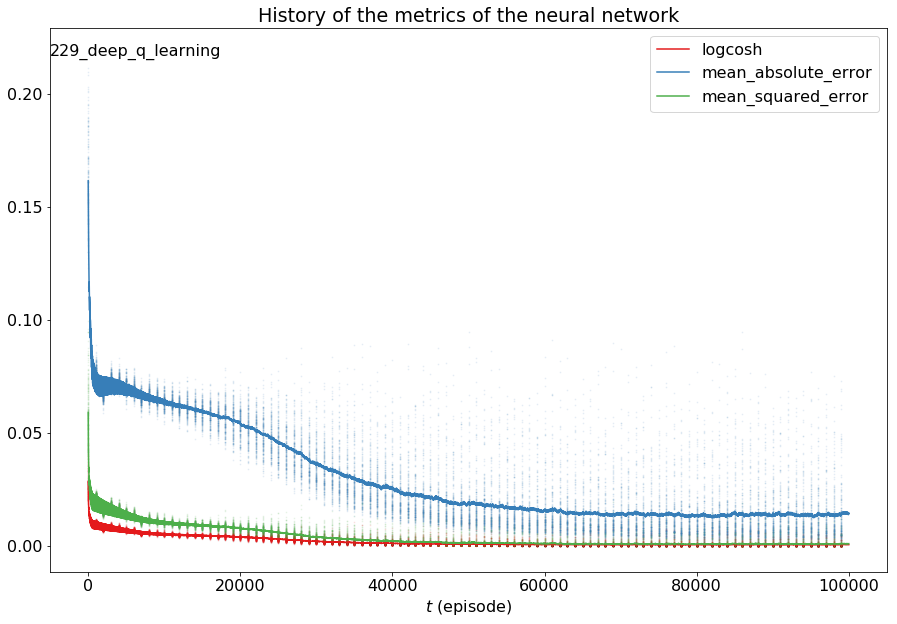

In [105]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_network_metrics(path_to_data, n_x_scatter=100, scatter=True)

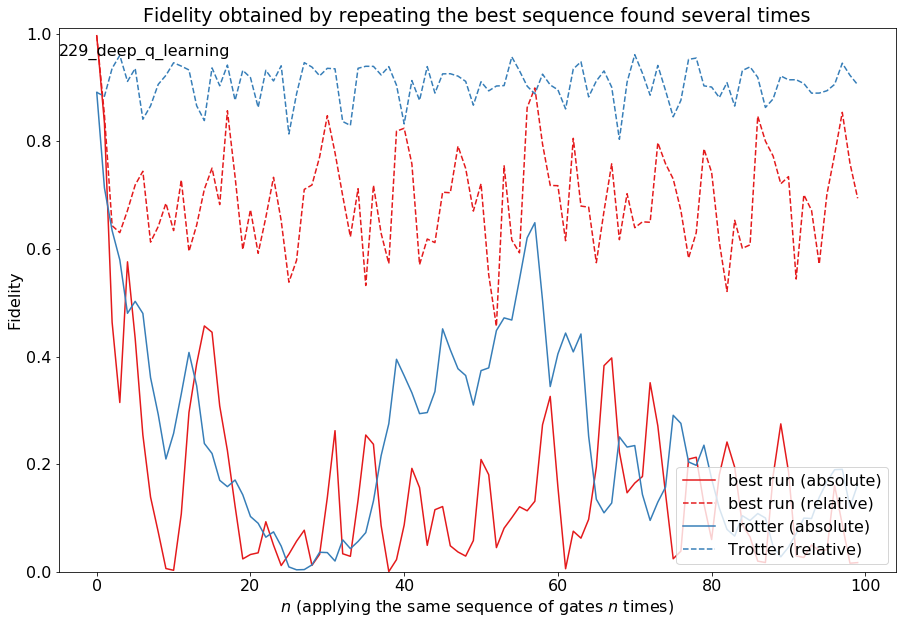

In [106]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_post_episode_rewards(path_to_data, ax=ax)

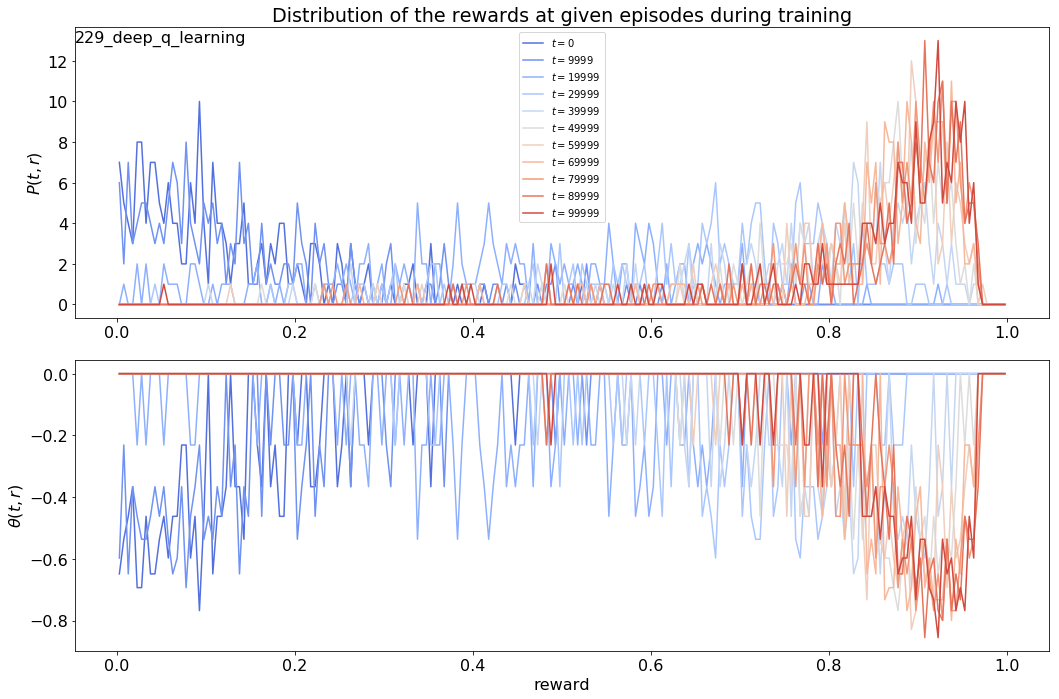

In [107]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

with plt.rc_context({'legend.fontsize': 10}):
    plots.plot_reward_distribution(path_to_data, n_bins=200, n_slices=11, with_theta=True, ax1=ax1, ax2=ax2)
    plt.tight_layout()

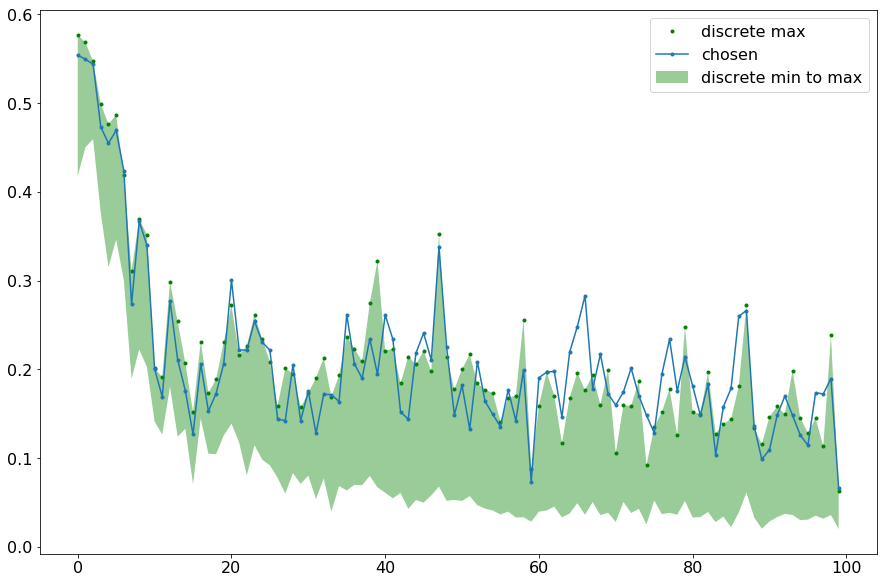

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_q_arrays(index_to_path[243], ax=ax)